In [1]:
import pandas as pd

import numpy as np
np.random.seed(42)

import idx2numpy as idx2np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# MNIST Modeling - June 2024
In Fall 2021, I participated in a General Assembly bootcamp for Data Science. During the class, one of the projects tackled was classifying handwritten digits from the MNIST dataset.

This analysis, here, re-visits that project. I will build a neural network model to classify the digits, seeing how accurate these predictions could be.

### Data Preparation

In [2]:
# File paths
train_images_path = './archive/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = './archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = './archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = './archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

# Loading data
X_train = idx2np.convert_from_file(train_images_path)
y_train = idx2np.convert_from_file(train_labels_path)
X_test = idx2np.convert_from_file(test_images_path)
y_test = idx2np.convert_from_file(test_labels_path)

In [3]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
#why does (None, None) return?

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(None, None)

A quick look at the images being examined:

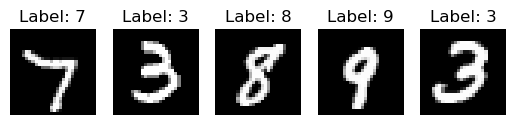

In [4]:
# Convert one-hot encoded labels back to digit values
num_samples = 5

# Select random indices to sample from the dataset
random_indices = np.random.choice(X_train.shape[0]
                                  , num_samples
                                  , replace = False)

# Plot the sampled images
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[idx], cmap = 'gray')  # Assuming images are grayscale
    plt.title(f"Label: {y_train[idx]}")  # Use the digit label instead of the one-hot encoded array
    plt.axis('off')

plt.show()

In [5]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Feed-Forward Neural Network
Building a simple, feed-forward neural network to set baseline of performance

In [6]:
model = Sequential([Input(shape = (28, 28, 1)) # Specify the input shape here
                    , Flatten()
                    , Dense(512, activation = 'relu')
                    , Dense(256, activation = 'relu')
                    , Dense(128, activation = 'relu')
                    , Dense(10, activation = 'softmax')
                   ])

model.compile(optimizer = 'adam'
              , loss = 'categorical_crossentropy'
              , metrics = ['accuracy']
             )

# Train the model for more epochs
history = model.fit(X_train
                    , y_train
                    , epochs = 20
                    , verbose = 2
                    , validation_data = (X_test, y_test)
                   )

Epoch 1/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9396 - loss: 0.1971 - val_accuracy: 0.9672 - val_loss: 0.1071
Epoch 2/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9738 - loss: 0.0868 - val_accuracy: 0.9742 - val_loss: 0.0907
Epoch 3/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9819 - loss: 0.0596 - val_accuracy: 0.9729 - val_loss: 0.1027
Epoch 4/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9789 - val_loss: 0.0779
Epoch 5/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9755 - val_loss: 0.0949
Epoch 6/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9750 - val_loss: 0.1071
Epoch 7/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9762 - val_loss: 0.1025
Epoch 8/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9803 - val_loss: 0.0985
Epoch 9/20
1875/1875 - 3s - 2ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9771 - 

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9787 - loss: 0.1373
Test Accuracy: 0.982699990272522


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

#### Results
Model performed with 98.27% accuracy. *Consider* Can we do better?

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



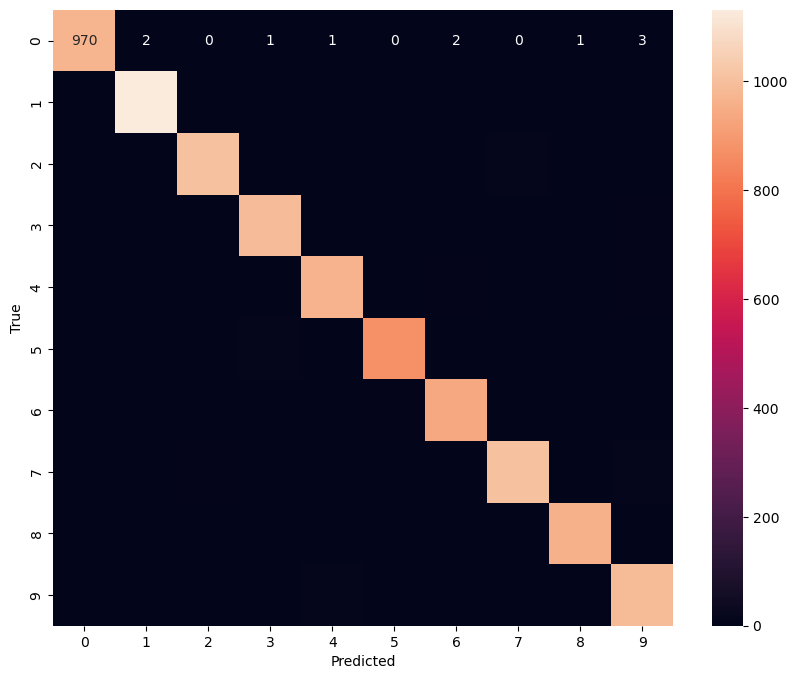

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

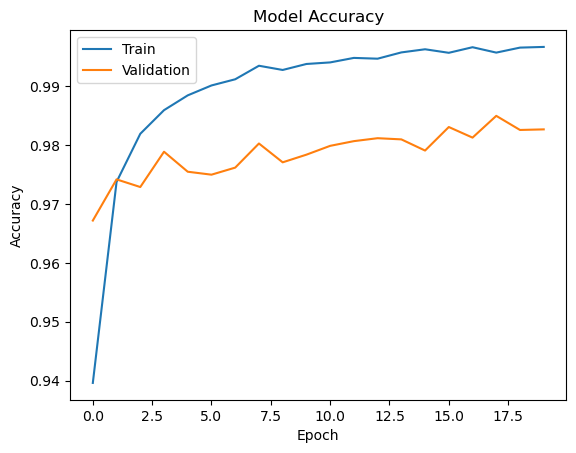

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

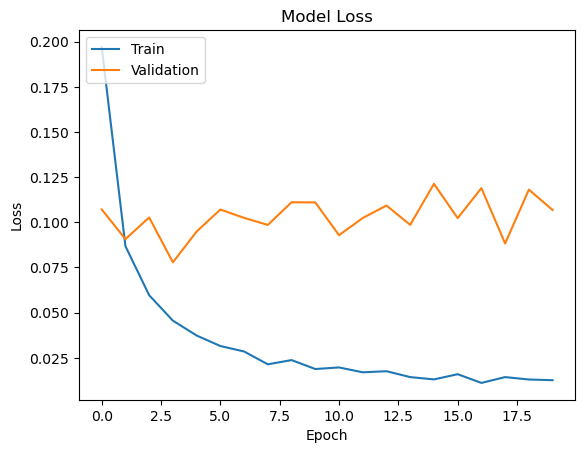

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

### Feed-Forward with Data Augmentation
Transforming images to improve model's generalizability, will this also improve performance?

Randomly, using keras's ImageDataGenerator() the images will be:
- Rotated by up to 10 degrees
- Zoomed in by up to 10%
- Shifted horizontally by up to 10% of the image's width
- Shifted vertically up to 10% of the image's height

In [12]:
# Create an instance of the ImageDataGenerator class with the desired transformations
datagen = ImageDataGenerator(rotation_range = 10          # Randomly rotate images by up to 10 degrees
                             , zoom_range = 0.1           # Randomly zoom in on images by up to 10%
                             , width_shift_range = 0.1    # Randomly shift images horizontally by up to 10% of the width
                             , height_shift_range = 0.1   # Randomly shift images vertically by up to 10% of the height
                            )

# Fit the ImageDataGenerator to the training data
datagen.fit(X_train)

# Use the augmented data generator to train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32)
                    , epochs = 20
                    , validation_data = (X_test, y_test))

Epoch 1/20
  40/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8104 - loss: 1.2029 

C:\Users\missm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9026 - loss: 0.3777 - val_accuracy: 0.9798 - val_loss: 0.0694
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9534 - loss: 0.1539 - val_accuracy: 0.9805 - val_loss: 0.0623
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9624 - loss: 0.1246 - val_accuracy: 0.9853 - val_loss: 0.0512
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9662 - loss: 0.1132 - val_accuracy: 0.9829 - val_loss: 0.0546
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9680 - loss: 0.1062 - val_accuracy: 0.9838 - val_loss: 0.0544
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9688 - loss: 0.1007 - val_accuracy: 0.9838 - val_loss: 0.0528
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9712 - loss: 0.0956 - val_accuracy: 0.9834 - val_loss: 0.0555
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9717 - loss: 0.0929 - val_accurac

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9849 - loss: 0.0576
Test Accuracy: 0.9868000149726868


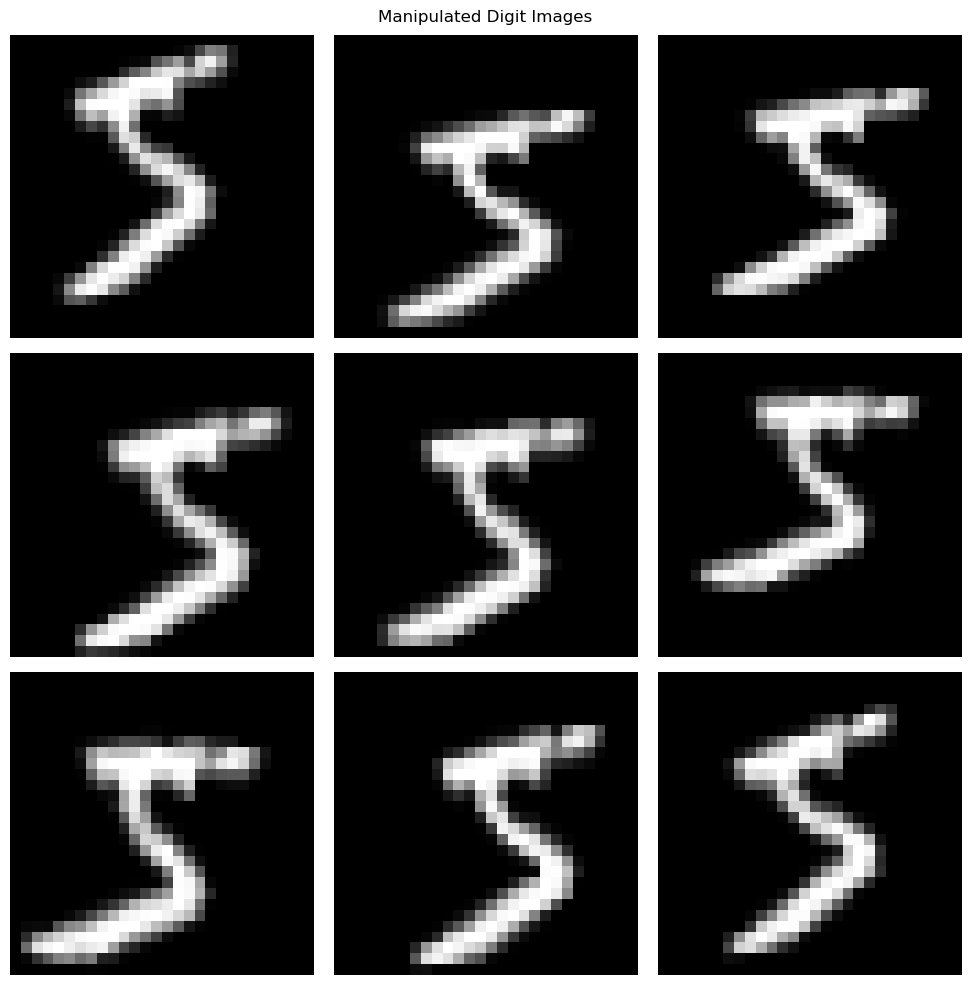

In [14]:
# Create a figure to display the images
plt.figure(figsize = (10, 10))

# Select a random image from the training set
sample_image = X_train[0]

# Generate augmented images and display them
for i in range(9):
    augmented_image = datagen.random_transform(sample_image)
    plt.suptitle('Manipulated Digit Images')
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.tight_layout()

plt.show()

#### Results
Model with data augmentation performed with 98.68% accuracy, better than a basic feed-forward neural network and likely more generalizable. Would a Convolutional Neural Network, ideal for image processing, perform better?

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



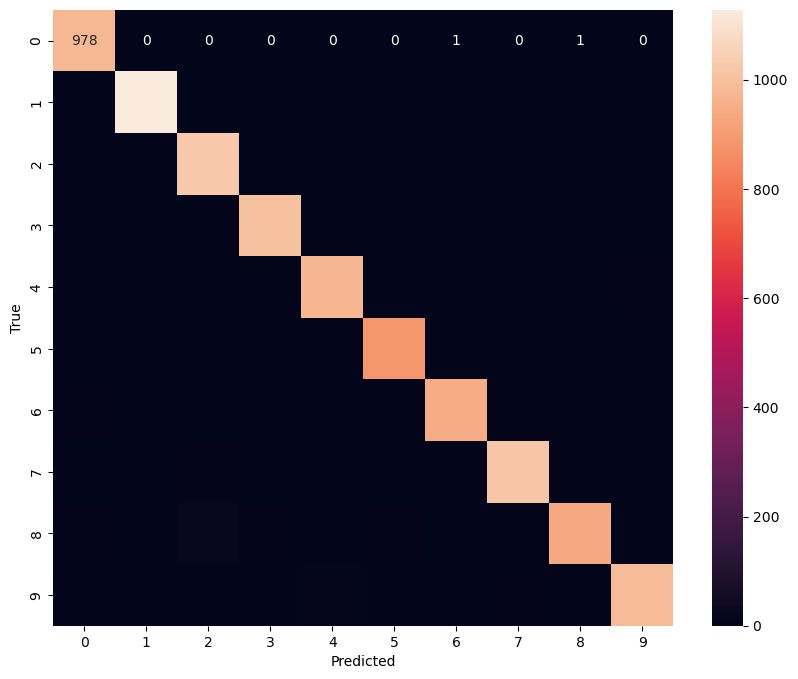

In [15]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

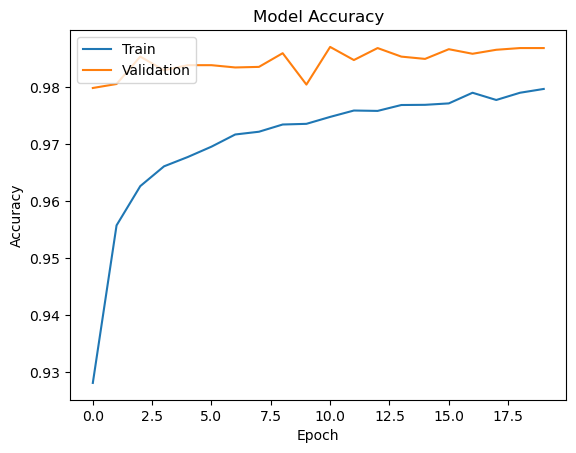

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

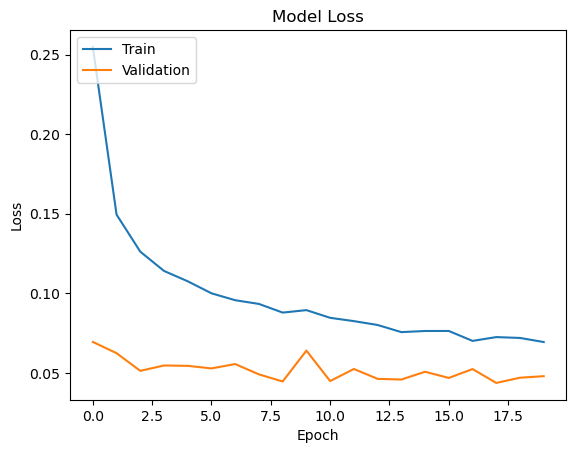

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

### Convolutional Neural Network
Can we further improve my predictions by using a convolutional neural network?

In [18]:
# Define the CNN model
cnn_model = Sequential([Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))
                        , MaxPooling2D((2, 2))
                        , Conv2D(64, (3, 3), activation = 'relu')
                        , MaxPooling2D((2, 2))
                        , Conv2D(64, (3, 3), activation = 'relu')
                        , Flatten()
                        , Dense(128, activation = 'relu')
                        , Dropout(0.5) # Regularization to prevent overfitting
                        , Dense(10, activation = 'softmax')
                       ])

# Compile the model
cnn_model.compile(optimizer = 'adam'
                  , loss = 'categorical_crossentropy'
                  , metrics = ['accuracy']
                 )

# Use the augmented data generator to train the model
history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32)
                        , epochs = 20
                        , validation_data = (X_test, y_test)
                       )

Epoch 1/20


C:\Users\missm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  35/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1818 - loss: 2.2567 

C:\Users\missm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7633 - loss: 0.7165 - val_accuracy: 0.9864 - val_loss: 0.0392
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9604 - loss: 0.1361 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9716 - loss: 0.0984 - val_accuracy: 0.9864 - val_loss: 0.0438
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.9915 - val_loss: 0.0235
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0679 - val_accuracy: 0.9913 - val_loss: 0.0281
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9820 - loss: 0.0652 - val_accuracy: 0.9918 - val_loss: 0.0274
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0522 - val_accuracy: 0.9919 - val_loss: 0.0235
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9860 - loss: 0.0502 - val_accura

In [19]:
# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 0.0289
Test Accuracy: 0.9934999942779541


#### Results
The CNN performed with 99.35% accuracy, better than the basic feed-forward neural network.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



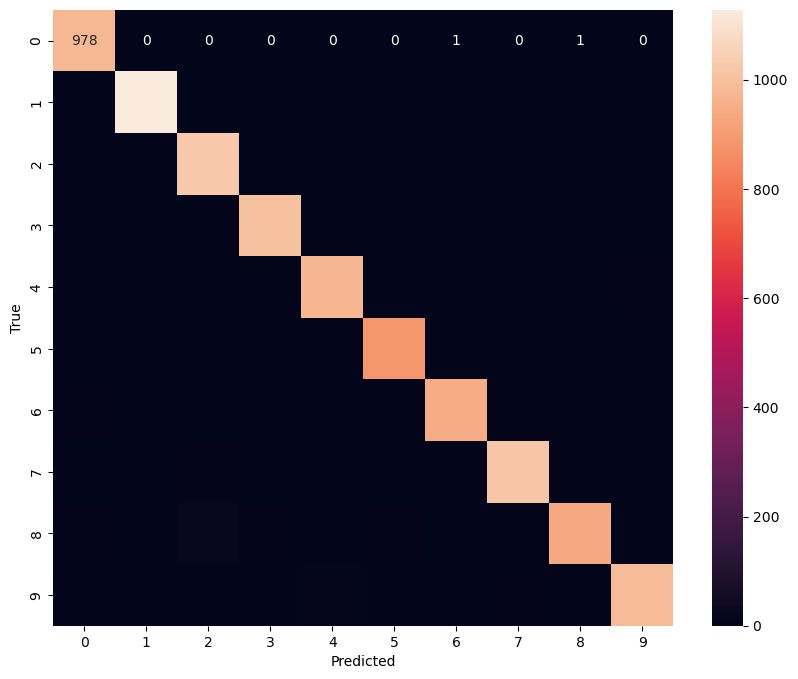

In [22]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A quick look at the model's incorrect predictions:

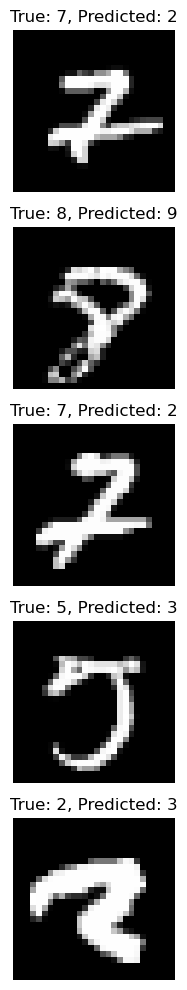

In [26]:
# Find indices where the predictions don't match the true labels
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select a sample of inaccurately predicted images
num_samples = 5
sample_indices = np.random.choice(incorrect_indices, num_samples, replace=False)

# Plot the sampled images stacked vertically
plt.figure(figsize=(8, 10))

for i, idx in enumerate(sample_indices):
    plt.subplot(num_samples, 1, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Assuming images are grayscale
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

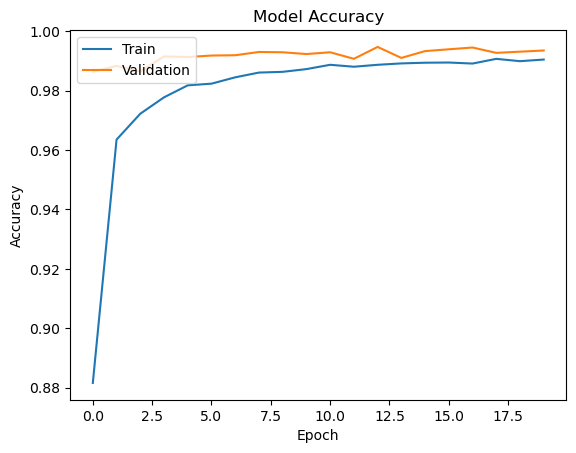

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

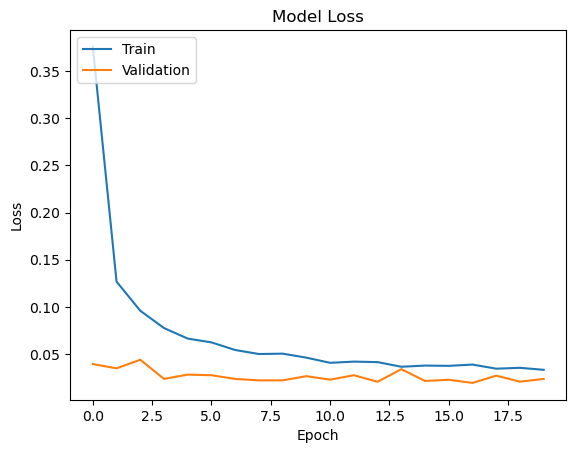

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()